In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [6]:
POINTS = 20
colors = cm.rainbow(np.linspace(0, 1, POINTS))

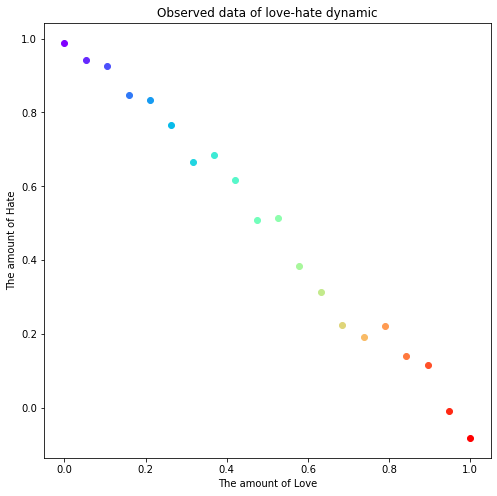

In [37]:
love = np.linspace(0, 1, POINTS)
hate = 1 - love + np.random.randn(love.shape[0]) * 0.05

plt.figure(figsize=(8,8))
for i, c in enumerate(colors):
    plt.scatter(love[i], hate[i], color=c)

plt.xlabel("The amount of Love")
plt.ylabel("The amount of Hate")
plt.title("Observed data of love-hate dynamic")


plt.savefig("figures/1.png")
plt.show()

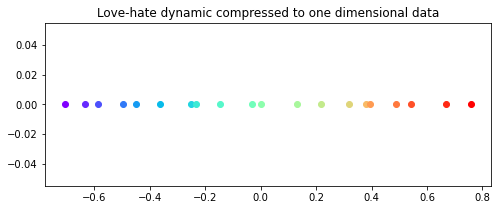

In [38]:
pca = PCA(n_components=1)

love_hate = np.concatenate([love.reshape(-1,1), hate.reshape(-1,1)], axis=1)
love_hate_unified = pca.fit_transform(love_hate)

plt.figure(figsize=(8,3))
for i, c in enumerate(colors):
    plt.scatter(love_hate_unified[i],0, color=c)

plt.title("Love-hate dynamic compressed to one dimensional data")
plt.savefig("figures/2.png")
plt.show()



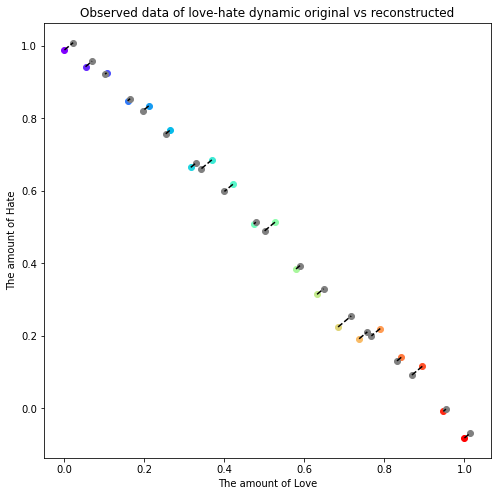

In [39]:
love_hate_reconstructed = pca.inverse_transform(love_hate_unified)
distances = []

plt.figure(figsize=(8,8))
for i, c in enumerate(colors):
    plt.scatter(love[i], hate[i], color=c)
    plt.scatter(love_hate_reconstructed[i,0], love_hate_reconstructed[i,1], color="gray")
    plt.plot([love[i], love_hate_reconstructed[i,0]], [hate[i], love_hate_reconstructed[i,1]], color='black', linestyle='--')
    
    distance = ((love[i] - love_hate_reconstructed[i,0]) ** 2 + (hate[i] - love_hate_reconstructed[i,1]) ** 2) ** 0.5
    distances.append(distance)

plt.xlabel("The amount of Love")
plt.ylabel("The amount of Hate")
plt.title("Observed data of love-hate dynamic original vs reconstructed")
plt.savefig("figures/3.png")
plt.show()



In [22]:
distances = np.array(distances)
distances.mean()

0.02388484074360623

In [29]:
special_person = np.array([[1.0, 1.0]])
special_person_unified = pca.transform(special_person)

print(special_person_unified[0,0])

-0.0062278415516516805


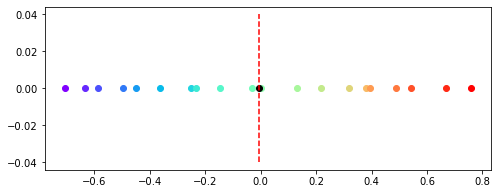

In [40]:
plt.figure(figsize=(8,3))
for i, c in enumerate(colors):
    plt.scatter(love_hate_unified[i],0, color=c)
    
plt.scatter(special_person_unified[0,0], 0, color="black")
plt.vlines(special_person_unified[0,0], ymin=-0.04, ymax=0.04, color="red", linestyles="--")

plt.savefig("figures/4.png")
plt.show()


In [30]:
special_person_reconstructed = pca.inverse_transform(special_person_unified)

print(special_person_reconstructed)

[[0.4956517  0.50811826]]
